## <center> Word2Vec from Scratch using Tensorflow

Word Embeddings are dense vector representations of words in low dimensional vector space. Word2Vec is the most popular word embedding model.  The use of Word2Vec is to group words that semantically similar in vector space. It computes similarities mathematically. 

In [5]:
Image(url= "1.png")

There are two variants :
1. CBOW (Continuous Bag of Words) : It tries to predict a word on based of its neighbours.
2. SkipGram : It tries to predict the neighbours of a given word.

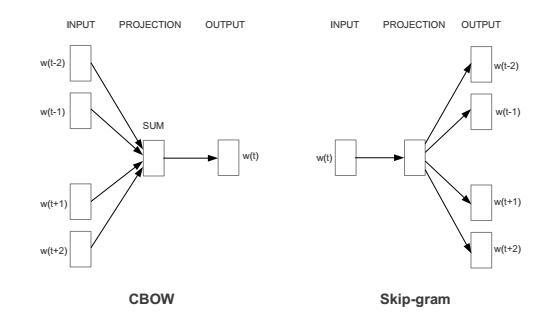

In [8]:
Image('Cbowskip.png')

# Steps:

1. Build a 3 layer neural network. 
2. The objective of network is to predict the neighbouring word given a word.
3. Remove the last layer and keep the input and hidden layer.
4. Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.

In [40]:
import numpy as np
import tensorflow as tf

In [41]:
corpus_raw = 'He is the king . The king is royal . She is the royal queen'
corpus_raw = corpus_raw.lower()

In [42]:
words = []
for word in corpus_raw.split():
    if word != '.': 
        words.append(word)

In [43]:
words = set(words) 

In [44]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [45]:
word2int = {}
int2word = {}
vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [46]:
print(word2int['queen'])

2


In [47]:
print(int2word[2])

queen


In [48]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
                 

In [49]:
raw_sentences

['he is the king ', ' the king is royal ', ' she is the royal queen']

In [50]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [51]:
data = []
WINDOW_SIZE = 2

def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


In [52]:
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [53]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [54]:
x_train = [] 
y_train = [] 
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))


In [55]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [56]:
print(x_train.shape, y_train.shape)

((34, 7), (34, 7))


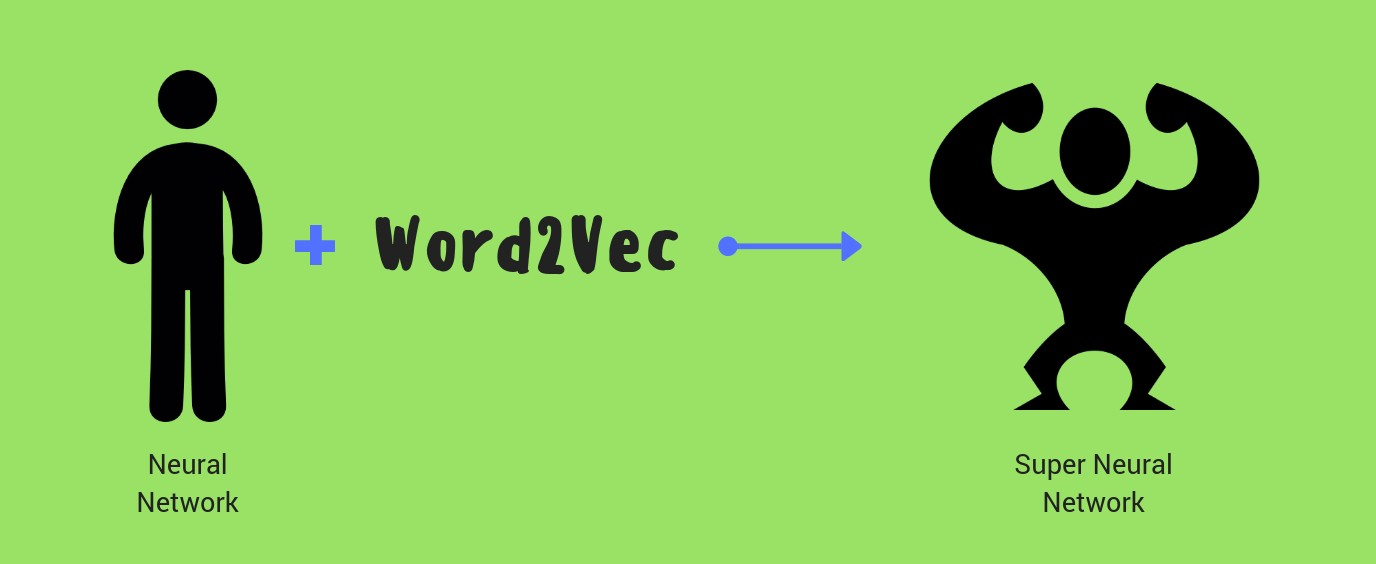

In [10]:
Image('3.jpeg')

In [57]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [58]:
EMBEDDING_DIM = 5 
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [59]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [60]:

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 4.1679401)
('loss is : ', 3.7732182)
('loss is : ', 3.4845052)
('loss is : ', 3.2613556)
('loss is : ', 3.0819035)
('loss is : ', 2.9341412)
('loss is : ', 2.8108845)
('loss is : ', 2.7073116)
('loss is : ', 2.6198385)
('loss is : ', 2.5456095)
('loss is : ', 2.482264)
('loss is : ', 2.4278245)
('loss is : ', 2.3806353)
('loss is : ', 2.3393226)
('loss is : ', 2.3027604)
('loss is : ', 2.2700405)
('loss is : ', 2.2404404)
('loss is : ', 2.213393)
('loss is : ', 2.1884577)
('loss is : ', 2.1652942)
('loss is : ', 2.1436403)
('loss is : ', 2.1232936)
('loss is : ', 2.1040981)
('loss is : ', 2.0859289)
('loss is : ', 2.0686893)
('loss is : ', 2.0522976)
('loss is : ', 2.0366881)
('loss is : ', 2.0218043)
('loss is : ', 2.0075967)
('loss is : ', 1.9940219)
('loss is : ', 1.9810407)
('loss is : ', 1.9686172)
('loss is : ', 1.9567189)
('loss is : ', 1.9453145)
('loss is : ', 1.9343758)
('loss is : ', 1.9238757)
('loss is : ', 1.9137894)
('loss is : ', 1.9040927)
('loss is : ',

('loss is : ', 1.3860456)
('loss is : ', 1.3857026)
('loss is : ', 1.3853621)
('loss is : ', 1.3850242)
('loss is : ', 1.3846889)
('loss is : ', 1.3843558)
('loss is : ', 1.3840251)
('loss is : ', 1.3836969)
('loss is : ', 1.3833711)
('loss is : ', 1.3830479)
('loss is : ', 1.3827268)
('loss is : ', 1.3824081)
('loss is : ', 1.3820918)
('loss is : ', 1.3817776)
('loss is : ', 1.3814659)
('loss is : ', 1.3811562)
('loss is : ', 1.3808492)
('loss is : ', 1.3805441)
('loss is : ', 1.3802413)
('loss is : ', 1.3799409)
('loss is : ', 1.3796424)
('loss is : ', 1.379346)
('loss is : ', 1.379052)
('loss is : ', 1.3787601)
('loss is : ', 1.3784702)
('loss is : ', 1.3781824)
('loss is : ', 1.3778967)
('loss is : ', 1.3776133)
('loss is : ', 1.3773317)
('loss is : ', 1.3770522)
('loss is : ', 1.3767747)
('loss is : ', 1.3764992)
('loss is : ', 1.3762256)
('loss is : ', 1.3759543)
('loss is : ', 1.3756845)
('loss is : ', 1.3754169)
('loss is : ', 1.3751513)
('loss is : ', 1.3748873)
('loss is : ',

('loss is : ', 1.3312371)
('loss is : ', 1.3312185)
('loss is : ', 1.3312001)
('loss is : ', 1.3311818)
('loss is : ', 1.3311635)
('loss is : ', 1.3311453)
('loss is : ', 1.3311272)
('loss is : ', 1.3311089)
('loss is : ', 1.3310908)
('loss is : ', 1.3310727)
('loss is : ', 1.3310547)
('loss is : ', 1.3310367)
('loss is : ', 1.3310188)
('loss is : ', 1.331001)
('loss is : ', 1.3309833)
('loss is : ', 1.3309655)
('loss is : ', 1.3309479)
('loss is : ', 1.3309301)
('loss is : ', 1.3309127)
('loss is : ', 1.3308951)
('loss is : ', 1.3308777)
('loss is : ', 1.3308603)
('loss is : ', 1.3308427)
('loss is : ', 1.3308254)
('loss is : ', 1.3308082)
('loss is : ', 1.3307909)
('loss is : ', 1.3307738)
('loss is : ', 1.3307565)
('loss is : ', 1.3307394)
('loss is : ', 1.3307226)
('loss is : ', 1.3307056)
('loss is : ', 1.3306887)
('loss is : ', 1.3306718)
('loss is : ', 1.330655)
('loss is : ', 1.3306381)
('loss is : ', 1.3306212)
('loss is : ', 1.3306047)
('loss is : ', 1.3305881)
('loss is : ',

('loss is : ', 1.3271453)
('loss is : ', 1.3271372)
('loss is : ', 1.3271291)
('loss is : ', 1.3271211)
('loss is : ', 1.3271132)
('loss is : ', 1.327105)
('loss is : ', 1.3270971)
('loss is : ', 1.3270891)
('loss is : ', 1.3270811)
('loss is : ', 1.3270732)
('loss is : ', 1.3270655)
('loss is : ', 1.3270576)
('loss is : ', 1.3270496)
('loss is : ', 1.3270417)
('loss is : ', 1.3270339)
('loss is : ', 1.327026)
('loss is : ', 1.3270183)
('loss is : ', 1.3270105)
('loss is : ', 1.3270025)
('loss is : ', 1.3269949)
('loss is : ', 1.3269873)
('loss is : ', 1.3269795)
('loss is : ', 1.3269718)
('loss is : ', 1.3269641)
('loss is : ', 1.3269565)
('loss is : ', 1.3269486)
('loss is : ', 1.326941)
('loss is : ', 1.3269334)
('loss is : ', 1.3269259)
('loss is : ', 1.3269182)
('loss is : ', 1.3269106)
('loss is : ', 1.3269032)
('loss is : ', 1.3268955)
('loss is : ', 1.3268881)
('loss is : ', 1.3268805)
('loss is : ', 1.3268728)
('loss is : ', 1.3268654)
('loss is : ', 1.3268579)
('loss is : ', 

('loss is : ', 1.3252115)
('loss is : ', 1.3252074)
('loss is : ', 1.3252027)
('loss is : ', 1.3251984)
('loss is : ', 1.325194)
('loss is : ', 1.3251896)
('loss is : ', 1.3251853)
('loss is : ', 1.3251809)
('loss is : ', 1.3251766)
('loss is : ', 1.3251722)
('loss is : ', 1.3251679)
('loss is : ', 1.3251635)
('loss is : ', 1.3251592)
('loss is : ', 1.3251549)
('loss is : ', 1.3251505)
('loss is : ', 1.3251462)
('loss is : ', 1.3251418)
('loss is : ', 1.3251375)
('loss is : ', 1.3251333)
('loss is : ', 1.3251289)
('loss is : ', 1.3251247)
('loss is : ', 1.3251204)
('loss is : ', 1.3251162)
('loss is : ', 1.325112)
('loss is : ', 1.3251076)
('loss is : ', 1.3251034)
('loss is : ', 1.3250992)
('loss is : ', 1.3250949)
('loss is : ', 1.3250906)
('loss is : ', 1.3250865)
('loss is : ', 1.3250822)
('loss is : ', 1.325078)
('loss is : ', 1.325074)
('loss is : ', 1.3250697)
('loss is : ', 1.3250655)
('loss is : ', 1.3250613)
('loss is : ', 1.325057)
('loss is : ', 1.325053)
('loss is : ', 1.3

('loss is : ', 1.3240706)
('loss is : ', 1.3240677)
('loss is : ', 1.324065)
('loss is : ', 1.3240623)
('loss is : ', 1.3240596)
('loss is : ', 1.3240569)
('loss is : ', 1.3240542)
('loss is : ', 1.3240516)
('loss is : ', 1.3240489)
('loss is : ', 1.3240461)
('loss is : ', 1.3240435)
('loss is : ', 1.3240408)
('loss is : ', 1.3240381)
('loss is : ', 1.3240354)
('loss is : ', 1.3240328)
('loss is : ', 1.3240302)
('loss is : ', 1.3240274)
('loss is : ', 1.3240249)
('loss is : ', 1.3240222)
('loss is : ', 1.3240194)
('loss is : ', 1.3240168)
('loss is : ', 1.3240143)
('loss is : ', 1.3240116)
('loss is : ', 1.3240091)
('loss is : ', 1.3240063)
('loss is : ', 1.3240037)
('loss is : ', 1.3240011)
('loss is : ', 1.3239985)
('loss is : ', 1.3239959)
('loss is : ', 1.3239931)
('loss is : ', 1.3239907)
('loss is : ', 1.3239881)
('loss is : ', 1.3239853)
('loss is : ', 1.3239828)
('loss is : ', 1.3239802)
('loss is : ', 1.3239776)
('loss is : ', 1.3239751)
('loss is : ', 1.3239726)
('loss is : '

('loss is : ', 1.3228755)
('loss is : ', 1.3228741)
('loss is : ', 1.3228729)
('loss is : ', 1.3228716)
('loss is : ', 1.3228703)
('loss is : ', 1.3228691)
('loss is : ', 1.3228676)
('loss is : ', 1.3228663)
('loss is : ', 1.322865)
('loss is : ', 1.3228636)
('loss is : ', 1.3228623)
('loss is : ', 1.3228612)
('loss is : ', 1.3228598)
('loss is : ', 1.3228585)
('loss is : ', 1.322857)
('loss is : ', 1.3228558)
('loss is : ', 1.3228544)
('loss is : ', 1.3228532)
('loss is : ', 1.3228519)
('loss is : ', 1.3228506)
('loss is : ', 1.3228494)
('loss is : ', 1.3228481)
('loss is : ', 1.3228468)
('loss is : ', 1.3228455)
('loss is : ', 1.322844)
('loss is : ', 1.3228427)
('loss is : ', 1.3228415)
('loss is : ', 1.3228403)
('loss is : ', 1.3228389)
('loss is : ', 1.3228376)
('loss is : ', 1.3228364)
('loss is : ', 1.3228351)
('loss is : ', 1.3228337)
('loss is : ', 1.3228325)
('loss is : ', 1.3228312)
('loss is : ', 1.3228298)
('loss is : ', 1.3228287)
('loss is : ', 1.3228273)
('loss is : ', 

('loss is : ', 1.3222471)
('loss is : ', 1.3222464)
('loss is : ', 1.3222456)
('loss is : ', 1.3222448)
('loss is : ', 1.322244)
('loss is : ', 1.3222433)
('loss is : ', 1.3222425)
('loss is : ', 1.3222418)
('loss is : ', 1.3222409)
('loss is : ', 1.32224)
('loss is : ', 1.3222394)
('loss is : ', 1.3222386)
('loss is : ', 1.3222378)
('loss is : ', 1.3222371)
('loss is : ', 1.3222363)
('loss is : ', 1.3222356)
('loss is : ', 1.3222349)
('loss is : ', 1.3222342)
('loss is : ', 1.3222333)
('loss is : ', 1.3222324)
('loss is : ', 1.3222319)
('loss is : ', 1.3222309)
('loss is : ', 1.3222302)
('loss is : ', 1.3222294)
('loss is : ', 1.3222287)
('loss is : ', 1.322228)
('loss is : ', 1.3222271)
('loss is : ', 1.3222264)
('loss is : ', 1.3222257)
('loss is : ', 1.3222249)
('loss is : ', 1.3222241)
('loss is : ', 1.3222234)
('loss is : ', 1.3222227)
('loss is : ', 1.3222219)
('loss is : ', 1.3222212)
('loss is : ', 1.3222204)
('loss is : ', 1.3222196)
('loss is : ', 1.3222188)
('loss is : ', 1

('loss is : ', 1.3220271)
('loss is : ', 1.3220265)
('loss is : ', 1.3220259)
('loss is : ', 1.3220253)
('loss is : ', 1.3220246)
('loss is : ', 1.322024)
('loss is : ', 1.3220234)
('loss is : ', 1.3220228)
('loss is : ', 1.3220222)
('loss is : ', 1.3220216)
('loss is : ', 1.322021)
('loss is : ', 1.3220204)
('loss is : ', 1.3220199)
('loss is : ', 1.3220192)
('loss is : ', 1.3220186)
('loss is : ', 1.3220181)
('loss is : ', 1.3220173)
('loss is : ', 1.3220167)
('loss is : ', 1.3220161)
('loss is : ', 1.3220156)
('loss is : ', 1.3220148)
('loss is : ', 1.3220143)
('loss is : ', 1.3220137)
('loss is : ', 1.3220131)
('loss is : ', 1.3220127)
('loss is : ', 1.3220119)
('loss is : ', 1.3220112)
('loss is : ', 1.3220108)
('loss is : ', 1.3220102)
('loss is : ', 1.3220096)
('loss is : ', 1.3220088)
('loss is : ', 1.3220084)
('loss is : ', 1.3220078)
('loss is : ', 1.3220072)
('loss is : ', 1.3220066)
('loss is : ', 1.322006)
('loss is : ', 1.3220054)
('loss is : ', 1.3220047)
('loss is : ', 

('loss is : ', 1.3217272)
('loss is : ', 1.3217268)
('loss is : ', 1.3217264)
('loss is : ', 1.321726)
('loss is : ', 1.3217255)
('loss is : ', 1.321725)
('loss is : ', 1.3217248)
('loss is : ', 1.3217243)
('loss is : ', 1.3217238)
('loss is : ', 1.3217235)
('loss is : ', 1.321723)
('loss is : ', 1.3217226)
('loss is : ', 1.3217221)
('loss is : ', 1.3217218)
('loss is : ', 1.3217213)
('loss is : ', 1.321721)
('loss is : ', 1.3217206)
('loss is : ', 1.3217201)
('loss is : ', 1.3217196)
('loss is : ', 1.3217192)
('loss is : ', 1.3217189)
('loss is : ', 1.3217186)
('loss is : ', 1.321718)
('loss is : ', 1.3217176)
('loss is : ', 1.3217173)
('loss is : ', 1.3217168)
('loss is : ', 1.3217164)
('loss is : ', 1.3217158)
('loss is : ', 1.3217155)
('loss is : ', 1.3217154)
('loss is : ', 1.3217148)
('loss is : ', 1.3217143)
('loss is : ', 1.3217138)
('loss is : ', 1.3217134)
('loss is : ', 1.3217131)
('loss is : ', 1.3217129)
('loss is : ', 1.3217121)
('loss is : ', 1.3217118)
('loss is : ', 1.

('loss is : ', 1.3215115)
('loss is : ', 1.3215113)
('loss is : ', 1.3215111)
('loss is : ', 1.3215108)
('loss is : ', 1.3215104)
('loss is : ', 1.3215101)
('loss is : ', 1.3215098)
('loss is : ', 1.3215095)
('loss is : ', 1.3215091)
('loss is : ', 1.3215091)
('loss is : ', 1.3215085)
('loss is : ', 1.3215083)
('loss is : ', 1.321508)
('loss is : ', 1.3215078)
('loss is : ', 1.3215073)
('loss is : ', 1.3215071)
('loss is : ', 1.3215069)
('loss is : ', 1.3215065)
('loss is : ', 1.3215061)
('loss is : ', 1.3215058)
('loss is : ', 1.3215055)
('loss is : ', 1.3215055)
('loss is : ', 1.3215051)
('loss is : ', 1.3215047)
('loss is : ', 1.3215044)
('loss is : ', 1.3215041)
('loss is : ', 1.3215038)
('loss is : ', 1.3215035)
('loss is : ', 1.3215033)
('loss is : ', 1.321503)
('loss is : ', 1.3215026)
('loss is : ', 1.3215023)
('loss is : ', 1.321502)
('loss is : ', 1.3215016)
('loss is : ', 1.3215015)
('loss is : ', 1.3215011)
('loss is : ', 1.3215009)
('loss is : ', 1.3215005)
('loss is : ', 

('loss is : ', 1.3214216)
('loss is : ', 1.3214213)
('loss is : ', 1.321421)
('loss is : ', 1.321421)
('loss is : ', 1.3214204)
('loss is : ', 1.3214202)
('loss is : ', 1.32142)
('loss is : ', 1.3214197)
('loss is : ', 1.3214195)
('loss is : ', 1.3214192)
('loss is : ', 1.321419)
('loss is : ', 1.3214189)
('loss is : ', 1.3214185)
('loss is : ', 1.321418)
('loss is : ', 1.3214179)
('loss is : ', 1.3214178)
('loss is : ', 1.3214176)
('loss is : ', 1.3214172)
('loss is : ', 1.321417)
('loss is : ', 1.3214167)
('loss is : ', 1.3214164)
('loss is : ', 1.3214163)
('loss is : ', 1.3214159)
('loss is : ', 1.3214158)
('loss is : ', 1.3214154)
('loss is : ', 1.3214152)
('loss is : ', 1.3214149)
('loss is : ', 1.3214147)
('loss is : ', 1.3214145)
('loss is : ', 1.3214141)
('loss is : ', 1.3214139)
('loss is : ', 1.3214136)
('loss is : ', 1.3214134)
('loss is : ', 1.321413)
('loss is : ', 1.3214129)
('loss is : ', 1.3214127)
('loss is : ', 1.3214124)
('loss is : ', 1.3214121)
('loss is : ', 1.321

('loss is : ', 1.3212833)
('loss is : ', 1.3212831)
('loss is : ', 1.3212827)
('loss is : ', 1.3212825)
('loss is : ', 1.3212825)
('loss is : ', 1.3212824)
('loss is : ', 1.3212821)
('loss is : ', 1.3212819)
('loss is : ', 1.3212816)
('loss is : ', 1.3212816)
('loss is : ', 1.3212813)
('loss is : ', 1.3212811)
('loss is : ', 1.3212807)
('loss is : ', 1.3212807)
('loss is : ', 1.3212805)
('loss is : ', 1.3212804)
('loss is : ', 1.3212801)
('loss is : ', 1.3212799)
('loss is : ', 1.3212798)
('loss is : ', 1.3212795)
('loss is : ', 1.3212793)
('loss is : ', 1.3212792)
('loss is : ', 1.3212788)
('loss is : ', 1.3212788)
('loss is : ', 1.3212786)
('loss is : ', 1.3212785)
('loss is : ', 1.3212781)
('loss is : ', 1.3212779)
('loss is : ', 1.3212779)
('loss is : ', 1.3212775)
('loss is : ', 1.3212773)
('loss is : ', 1.3212771)
('loss is : ', 1.3212769)
('loss is : ', 1.3212768)
('loss is : ', 1.3212767)
('loss is : ', 1.3212765)
('loss is : ', 1.3212763)
('loss is : ', 1.3212761)
('loss is : 

('loss is : ', 1.3212045)
('loss is : ', 1.3212045)
('loss is : ', 1.3212043)
('loss is : ', 1.3212043)
('loss is : ', 1.3212042)
('loss is : ', 1.3212039)
('loss is : ', 1.3212038)
('loss is : ', 1.3212036)
('loss is : ', 1.3212034)
('loss is : ', 1.3212032)
('loss is : ', 1.321203)
('loss is : ', 1.3212029)
('loss is : ', 1.3212029)
('loss is : ', 1.3212025)
('loss is : ', 1.3212023)
('loss is : ', 1.3212023)
('loss is : ', 1.3212022)
('loss is : ', 1.3212019)
('loss is : ', 1.3212018)
('loss is : ', 1.3212017)
('loss is : ', 1.3212013)
('loss is : ', 1.3212012)
('loss is : ', 1.3212011)
('loss is : ', 1.321201)
('loss is : ', 1.3212008)
('loss is : ', 1.3212006)
('loss is : ', 1.3212004)
('loss is : ', 1.3212003)
('loss is : ', 1.3212001)
('loss is : ', 1.3212)
('loss is : ', 1.3211997)
('loss is : ', 1.3211997)
('loss is : ', 1.3211995)
('loss is : ', 1.3211994)
('loss is : ', 1.3211991)
('loss is : ', 1.3211988)
('loss is : ', 1.3211988)
('loss is : ', 1.3211986)
('loss is : ', 1.

('loss is : ', 1.321155)
('loss is : ', 1.3211547)
('loss is : ', 1.3211547)
('loss is : ', 1.3211546)
('loss is : ', 1.3211545)
('loss is : ', 1.3211544)
('loss is : ', 1.3211542)
('loss is : ', 1.321154)
('loss is : ', 1.3211538)
('loss is : ', 1.3211538)
('loss is : ', 1.3211535)
('loss is : ', 1.3211533)
('loss is : ', 1.3211533)
('loss is : ', 1.321153)
('loss is : ', 1.321153)
('loss is : ', 1.3211527)
('loss is : ', 1.3211527)
('loss is : ', 1.3211526)
('loss is : ', 1.3211524)
('loss is : ', 1.3211523)
('loss is : ', 1.3211521)
('loss is : ', 1.3211521)
('loss is : ', 1.3211517)
('loss is : ', 1.3211517)
('loss is : ', 1.3211515)
('loss is : ', 1.3211513)
('loss is : ', 1.3211513)
('loss is : ', 1.3211511)
('loss is : ', 1.3211509)
('loss is : ', 1.3211508)
('loss is : ', 1.3211507)
('loss is : ', 1.3211505)
('loss is : ', 1.3211503)
('loss is : ', 1.3211503)
('loss is : ', 1.3211501)
('loss is : ', 1.3211501)
('loss is : ', 1.3211498)
('loss is : ', 1.3211497)
('loss is : ', 1

('loss is : ', 1.3211094)
('loss is : ', 1.3211094)
('loss is : ', 1.3211092)
('loss is : ', 1.3211092)
('loss is : ', 1.3211089)
('loss is : ', 1.3211088)
('loss is : ', 1.3211087)
('loss is : ', 1.3211087)
('loss is : ', 1.3211085)
('loss is : ', 1.3211082)
('loss is : ', 1.3211082)
('loss is : ', 1.3211081)
('loss is : ', 1.321108)
('loss is : ', 1.3211077)
('loss is : ', 1.3211076)
('loss is : ', 1.3211075)
('loss is : ', 1.3211074)
('loss is : ', 1.3211071)
('loss is : ', 1.3211071)
('loss is : ', 1.321107)
('loss is : ', 1.3211069)
('loss is : ', 1.3211068)
('loss is : ', 1.3211067)
('loss is : ', 1.3211064)
('loss is : ', 1.3211064)
('loss is : ', 1.3211062)
('loss is : ', 1.3211061)
('loss is : ', 1.3211061)
('loss is : ', 1.321106)
('loss is : ', 1.3211057)
('loss is : ', 1.3211056)
('loss is : ', 1.3211054)
('loss is : ', 1.3211052)
('loss is : ', 1.3211051)
('loss is : ', 1.321105)
('loss is : ', 1.321105)
('loss is : ', 1.3211049)
('loss is : ', 1.3211048)
('loss is : ', 1.

('loss is : ', 1.3210595)
('loss is : ', 1.3210595)
('loss is : ', 1.3210592)
('loss is : ', 1.3210592)
('loss is : ', 1.3210591)
('loss is : ', 1.3210589)
('loss is : ', 1.321059)
('loss is : ', 1.3210589)
('loss is : ', 1.3210586)
('loss is : ', 1.3210586)
('loss is : ', 1.3210584)
('loss is : ', 1.3210582)
('loss is : ', 1.3210582)
('loss is : ', 1.321058)
('loss is : ', 1.3210579)
('loss is : ', 1.3210578)
('loss is : ', 1.3210577)
('loss is : ', 1.3210576)
('loss is : ', 1.3210576)
('loss is : ', 1.3210573)
('loss is : ', 1.3210573)
('loss is : ', 1.3210571)
('loss is : ', 1.321057)
('loss is : ', 1.321057)
('loss is : ', 1.3210568)
('loss is : ', 1.3210567)
('loss is : ', 1.3210566)
('loss is : ', 1.3210565)
('loss is : ', 1.3210564)
('loss is : ', 1.3210562)
('loss is : ', 1.3210561)
('loss is : ', 1.321056)
('loss is : ', 1.3210558)
('loss is : ', 1.3210558)
('loss is : ', 1.3210557)
('loss is : ', 1.3210555)
('loss is : ', 1.3210554)
('loss is : ', 1.3210554)
('loss is : ', 1.

('loss is : ', 1.3210039)
('loss is : ', 1.3210039)
('loss is : ', 1.3210039)
('loss is : ', 1.3210038)
('loss is : ', 1.3210038)
('loss is : ', 1.3210037)
('loss is : ', 1.3210033)
('loss is : ', 1.3210034)
('loss is : ', 1.3210033)
('loss is : ', 1.3210032)
('loss is : ', 1.321003)
('loss is : ', 1.321003)
('loss is : ', 1.321003)
('loss is : ', 1.3210028)
('loss is : ', 1.3210027)
('loss is : ', 1.3210025)
('loss is : ', 1.3210025)
('loss is : ', 1.3210025)
('loss is : ', 1.3210022)
('loss is : ', 1.3210021)
('loss is : ', 1.3210021)
('loss is : ', 1.321002)
('loss is : ', 1.321002)
('loss is : ', 1.3210018)
('loss is : ', 1.3210018)
('loss is : ', 1.3210016)
('loss is : ', 1.3210016)
('loss is : ', 1.3210015)
('loss is : ', 1.3210014)
('loss is : ', 1.3210012)
('loss is : ', 1.3210012)
('loss is : ', 1.3210009)
('loss is : ', 1.3210009)
('loss is : ', 1.3210009)
('loss is : ', 1.3210008)
('loss is : ', 1.3210006)
('loss is : ', 1.3210006)
('loss is : ', 1.3210006)
('loss is : ', 1.

('loss is : ', 1.3209598)
('loss is : ', 1.3209596)
('loss is : ', 1.3209596)
('loss is : ', 1.3209596)
('loss is : ', 1.3209594)
('loss is : ', 1.3209593)
('loss is : ', 1.3209592)
('loss is : ', 1.3209591)
('loss is : ', 1.3209591)
('loss is : ', 1.3209591)
('loss is : ', 1.3209589)
('loss is : ', 1.3209589)
('loss is : ', 1.3209586)
('loss is : ', 1.3209585)
('loss is : ', 1.3209585)
('loss is : ', 1.3209585)
('loss is : ', 1.3209585)
('loss is : ', 1.3209583)
('loss is : ', 1.3209583)
('loss is : ', 1.3209581)
('loss is : ', 1.3209581)
('loss is : ', 1.320958)
('loss is : ', 1.3209579)
('loss is : ', 1.3209579)
('loss is : ', 1.3209579)
('loss is : ', 1.3209578)
('loss is : ', 1.3209575)
('loss is : ', 1.3209575)
('loss is : ', 1.3209573)
('loss is : ', 1.3209572)
('loss is : ', 1.3209573)
('loss is : ', 1.3209571)
('loss is : ', 1.3209571)
('loss is : ', 1.3209569)
('loss is : ', 1.3209569)
('loss is : ', 1.3209568)
('loss is : ', 1.3209568)
('loss is : ', 1.3209567)
('loss is : '

('loss is : ', 1.3209163)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 1.3209159)
('loss is : ', 1.3209159)
('loss is : ', 1.3209159)
('loss is : ', 1.3209157)
('loss is : ', 1.3209157)
('loss is : ', 1.3209157)
('loss is : ', 1.3209155)
('loss is : ', 1.3209155)
('loss is : ', 1.3209153)
('loss is : ', 1.3209153)
('loss is : ', 1.3209152)
('loss is : ', 1.3209151)
('loss is : ', 1.3209151)
('loss is : ', 1.320915)
('loss is : ', 1.320915)
('loss is : ', 1.3209149)
('loss is : ', 1.3209149)
('loss is : ', 1.3209146)
('loss is : ', 1.3209146)
('loss is : ', 1.3209145)
('loss is : ', 1.3209144)
('loss is : ', 1.3209144)
('loss is : ', 1.3209144)
('loss is : ', 1.3209143)
('loss is : ', 1.3209141)
('loss is : ', 1.3209141)
('loss is : ', 1.3209139)
('loss is : ', 1.320914)
('loss is : ', 1.3209139)
('loss is : ', 1.3209138)
('loss is : ', 1.3209138)
('loss is : ', 1.3209138)
('loss is : ', 1.3209137)
('loss is : ', 

('loss is : ', 1.320887)
('loss is : ', 1.3208869)
('loss is : ', 1.3208867)
('loss is : ', 1.3208867)
('loss is : ', 1.3208867)
('loss is : ', 1.3208866)
('loss is : ', 1.3208865)
('loss is : ', 1.3208865)
('loss is : ', 1.3208864)
('loss is : ', 1.3208861)
('loss is : ', 1.3208863)
('loss is : ', 1.3208861)
('loss is : ', 1.3208861)
('loss is : ', 1.320886)
('loss is : ', 1.320886)
('loss is : ', 1.3208859)
('loss is : ', 1.3208859)
('loss is : ', 1.3208858)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208855)
('loss is : ', 1.3208855)
('loss is : ', 1.3208857)
('loss is : ', 1.3208853)
('loss is : ', 1.3208852)
('loss is : ', 1.3208852)
('loss is : ', 1.3208852)
('loss is : ', 1.3208852)
('loss is : ', 1.3208849)
('loss is : ', 1.3208849)
('loss is : ', 1.3208848)
('loss is : ', 1.3208849)
('loss is : ', 1.3208848)
('loss is : ', 1.3208847)
('loss is : ', 1.3208847)
('loss is : ', 1.3208846)
('loss is : ', 1.3208846)
('loss is : ', 

('loss is : ', 1.3208525)
('loss is : ', 1.3208525)
('loss is : ', 1.3208525)
('loss is : ', 1.3208524)
('loss is : ', 1.3208523)
('loss is : ', 1.3208523)
('loss is : ', 1.3208523)
('loss is : ', 1.3208522)
('loss is : ', 1.3208519)
('loss is : ', 1.3208519)
('loss is : ', 1.3208519)
('loss is : ', 1.3208519)
('loss is : ', 1.3208518)
('loss is : ', 1.3208517)
('loss is : ', 1.3208517)
('loss is : ', 1.3208517)
('loss is : ', 1.3208516)
('loss is : ', 1.3208514)
('loss is : ', 1.3208514)
('loss is : ', 1.3208514)
('loss is : ', 1.3208514)
('loss is : ', 1.3208513)
('loss is : ', 1.3208514)
('loss is : ', 1.3208513)
('loss is : ', 1.3208513)
('loss is : ', 1.3208512)
('loss is : ', 1.3208512)
('loss is : ', 1.3208511)
('loss is : ', 1.3208511)
('loss is : ', 1.3208511)
('loss is : ', 1.3208507)
('loss is : ', 1.3208508)
('loss is : ', 1.3208507)
('loss is : ', 1.3208507)
('loss is : ', 1.3208506)
('loss is : ', 1.3208506)
('loss is : ', 1.3208505)
('loss is : ', 1.3208505)
('loss is : 

In [61]:
print(sess.run(W1))
print(sess.run(b1))

[[-0.17373456 -1.90661287 -0.39683333  0.87628138 -1.64504671]
 [-2.29237747  0.57349968  0.76842088  1.74004734  0.50708216]
 [-1.07539284 -0.32102567 -2.10811305  0.63235164  0.21070953]
 [ 2.11095309  0.77672952 -0.19719762  0.53657693  0.58668923]
 [-1.06024134 -0.57262915  0.08575248 -0.84860462 -2.524055  ]
 [ 0.47078717 -1.46231759  2.2114563   0.3248021   1.409513  ]
 [ 1.10356867  1.58379674  0.19508909 -0.4911136  -1.39973557]]
----------
[ 0.54745585 -0.32183772 -0.38151336  0.22954473 -1.35424232]
----------


In [62]:
vectors = sess.run(W1 + b1)

In [63]:
vectors

array([[ 0.3737213 , -2.22845054, -0.77834666,  1.10582614, -2.99928904],
       [-1.74492168,  0.25166196,  0.38690752,  1.96959209, -0.84716016],
       [-0.527937  , -0.64286339, -2.48962641,  0.8618964 , -1.14353275],
       [ 2.65840888,  0.4548918 , -0.57871097,  0.76612163, -0.76755309],
       [-0.51278549, -0.89446688, -0.29576087, -0.61905992, -3.87829733],
       [ 1.01824307, -1.78415537,  1.82994294,  0.5543468 ,  0.05527067],
       [ 1.65102458,  1.26195908, -0.18642427, -0.26156887, -2.75397778]], dtype=float32)

In [64]:
print(vectors[ word2int['queen'] ])

[-0.527937   -0.64286339 -2.48962641  0.8618964  -1.14353275]


In [65]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [67]:
print(int2word[find_closest(word2int['queen'], vectors)])

king
